
# 1. 实现第一个神经网络

## 1.1 准备数据

### 1. 标量 (0 维张量)

高维张量都是由标量组成的。

In [52]:
from torch import FloatTensor, LongTensor

FloatTensor(1), LongTensor(1)

(tensor([0.]), tensor([0]))

### 2. 向量 (1 维张量)

In [53]:
temp = FloatTensor([1, 2, 3])

temp

tensor([1., 2., 3.])

### 3. 矩阵 (2 维张量)

In [54]:
temp = FloatTensor([[1, 2, 3], [4, 5, 6]])

temp

tensor([[1., 2., 3.],
        [4., 5., 6.]])

### 4. 3 维张量

In [55]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch

panda_image = Image.open('./panda.jpg').resize(size=(224, 224))
panda_array = np.array(panda_image)
panda_tensor = torch.from_numpy(panda_array)  # type: torch.Tensor

panda_tensor.size()

torch.Size([224, 224, 3])

### 5. 切片张量

In [56]:
sales = torch.FloatTensor([100.0, 323.2, 333.4, 444.5, 1000, 2.333])

sales[:3]

tensor([100.0000, 323.2000, 333.4000])

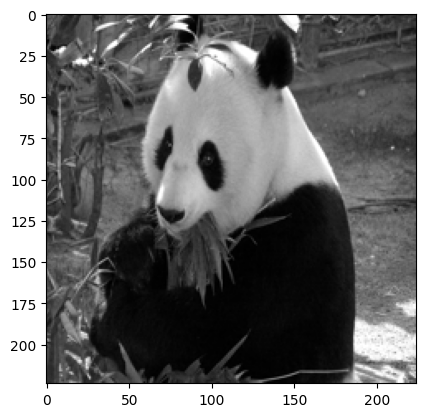

In [57]:
# 显示红色通道
plt.imshow(panda_tensor[:, :, 0].numpy(), cmap='gray')

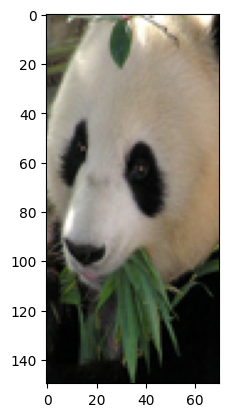

In [58]:
plt.imshow(panda_tensor[25:175, 60:130, ].numpy())

### 6. 4 维张量

e.g.: 批图像。

### 7. 5 维张量

e.g.: 视频数据。

### 8. GPU张量

GPU 张量可以提升计算速度。

In [59]:
MPS_DEVICE = 'mps'

a = torch.rand((10000, 10000))
b = torch.rand((10000, 10000))
a_mps = torch.rand((10000, 10000), device=MPS_DEVICE)
b_mps = torch.rand((10000, 10000), device=MPS_DEVICE)

In [60]:
a * b

tensor([[0.3299, 0.0992, 0.6129,  ..., 0.1276, 0.6510, 0.2180],
        [0.1280, 0.3999, 0.0742,  ..., 0.2862, 0.0275, 0.0783],
        [0.6364, 0.8587, 0.2033,  ..., 0.1189, 0.6771, 0.3868],
        ...,
        [0.8665, 0.6867, 0.0159,  ..., 0.0391, 0.0993, 0.1688],
        [0.1895, 0.3880, 0.2374,  ..., 0.0193, 0.7547, 0.0863],
        [0.5802, 0.0024, 0.7343,  ..., 0.4878, 0.3206, 0.1470]])

In [61]:
a_mps * b_mps

tensor([[0.0405, 0.1757, 0.0238,  ..., 0.1166, 0.8181, 0.1872],
        [0.0030, 0.0477, 0.3466,  ..., 0.6406, 0.7465, 0.1850],
        [0.0388, 0.3344, 0.3996,  ..., 0.1925, 0.3903, 0.0963],
        ...,
        [0.2118, 0.2714, 0.2499,  ..., 0.0366, 0.0788, 0.3964],
        [0.1190, 0.0565, 0.0866,  ..., 0.2945, 0.7021, 0.5767],
        [0.0507, 0.3253, 0.2227,  ..., 0.6128, 0.4942, 0.0030]],
       device='mps:0')

### 9. 变量

In [62]:
x = torch.ones((2, 2), requires_grad=True)
y = x.mean()  # type: torch.Tensor
y.backward()

x.grad

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])

In [63]:
x.grad_fn

In [64]:
x.data

tensor([[1., 1.],
        [1., 1.]])

In [65]:
y.grad_fn

# 1.2 为神经网络创建数据

In [66]:
from torch import Tensor
from torch.autograd import Variable


def get_data():
    X_train = np.asarray([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
                          7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1])
    y_train = np.asarray([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
                          2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])

    X = torch.from_numpy(X_train).type(torch.FloatTensor)  # type: Tensor
    X = X.to(MPS_DEVICE)
    X = X.view(17, 1)
    X.requires_grad = False
    y = torch.from_numpy(y_train).type(torch.FloatTensor).to(MPS_DEVICE)
    y.requires_grad = False

    return X, y


get_data()

(tensor([[ 3.3000],
         [ 4.4000],
         [ 5.5000],
         [ 6.7100],
         [ 6.9300],
         [ 4.1680],
         [ 9.7790],
         [ 6.1820],
         [ 7.5900],
         [ 2.1670],
         [ 7.0420],
         [10.7910],
         [ 5.3130],
         [ 7.9970],
         [ 5.6540],
         [ 9.2700],
         [ 3.1000]], device='mps:0'),
 tensor([1.7000, 2.7600, 2.0900, 3.1900, 1.6940, 1.5730, 3.3660, 2.5960, 2.5300,
         1.2210, 2.8270, 3.4650, 1.6500, 2.9040, 2.4200, 2.9400, 1.3000],
        device='mps:0'))

### 1. 创建学习参数

In [67]:
def get_weights():
    w = Variable(torch.randn(1), requires_grad=True)
    b = Variable(torch.randn(1), requires_grad=True)

    return w, b

### 2. 神经网络模型

## 1.3 加载数据

### 1. DataSet 类

DataSet 必须实现两个函数: ```__len__(self)``` 和 ```__getitem__(self, idx)```。

In [72]:
from dot_cat_dataset import DogAndCatsDataSet

datasets = DogAndCatsDataSet(root_path="/Volumes/WTTCH/数据集/archive/PetImages")
datasets[0]

('9733.jpg', 'Cat')

In [73]:
from torch.utils.data import DataLoader

data_loader = DataLoader(datasets, batch_size=32, num_workers=2)

In [75]:
for image, label in data_loader:
    print(label)
    break

('Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat')
